# Homework 2
Section 8.2

Math 404

Winter 2020

Logan Schelly

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 8.6
Begin implementing a ``LinearModel`` class for the special case where the control model $G_k = I$, is trivial, and all but the state and the observation are constant, that is, where $F_k = F$, $H_k = H$, $P_k = P$, $Q_k = Q$, and $\mathbf{u}_k = \mathbf{u}$ are all constant, by writing an initialization method that stores the transition and observation models, noise covariances, and control vector.

In [2]:
class LinearModel(object):
    def __init__(self, F, Q, H, R, u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matric for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        self.transition_model = F
        self.state_noise_covariance = Q
        self.observation_model = H
        self.observation_noise_covariance = R
        self.control_vector = u
        return

## Exercise 8.7
Add a method to your ``LinearModel`` class to generate a state and observation
sequence by evolving the system from a given initial state (the function ``numpy
.random.multivariate_normal`` will be useful). To do this, implement the
following:

In [3]:
#Inherit from previously defined class.
#Give child class the same name.
class LinearModel(LinearModel):
    
    #Now it's like you're writing additional methods for the same class.
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the linear system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            States 0 through N-1, given by each column.
        obs : ndarray of shape (m,N)
            Observations 0 through N-1, given by each column.
        """
        #Unpack the variables.
        F = self.transition_model
        H = self.observation_model
        Q = self.state_noise_covariance
        R = self.observation_noise_covariance
        u = self.control_vector
        
        #Initialize space for states and observations.
        m, n = H.shape
        X = np.empty((n, N)) #states
        Y = np.empty((m, N)) #obs
        
        #Store the original state and observation.
        X[:, 0] = x0
        v0 = np.random.multivariate_normal(np.zeros(m), R) #observation noise
        Y[:, 0] = H.dot(x0) + v0
        
        #Iteratively calculate susequent states and observations
        for k in range(1,N):
            #Find the state noise.
            w = np.random.multivariate_normal(np.zeros(n), Q)
            #Update state with equation 8.10a
            X[:,k] = F.dot(X[:,k-1]) + u + w #G is I.
            #Find observation noise
            v = np.random.multivariate_normal(np.zeros(m), R)
            #Create next observation with equation 8.10b
            Y[:,k] = H.dot(X[:,k]) + v
        
        return X, Y #X is states, Y is obs
            


## Exercise 8.8
Instantiate your ``LinearModel`` class for a projectile as in Example 8.2.6. Assume
the time step is $\Delta_t = 0.1s$, and the model variance is $Q_k = Q = 0.1I_4$
for all $k \in \mathbb{N}$. Let the observation error be $R_k = R = 5000I_2$.

Use the ``evolve`` method to simulate the true state and observed trajectory of
the projectile, beginning with initial state
$$
\mathbf{x}_0
=
\begin{pmatrix}
    0\\
    0\\
    300\\
    600
\end{pmatrix}.
$$
Approximately 1250 time steps should be sufficient for the projectile to hit
the ground (i.e. for the $y$ coordinate to return to 0). Your results should
qualitatively match those given in Figure 8.2.

In [4]:
dt = 0.1#seconds
Q = 0.1 * np.eye(4)
R = 5000 * np.eye(2)
x0 = np.array([0, 0, 300, 600])
g= -9.8

#Construct F.
F = np.eye(4)
#Set the up 2 off-diagonal to dt
F[np.r_[:2], 2+np.r_[:2]] = dt
print(F)

[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]


In [5]:
#Construct u.
u = np.zeros(4)
u[-1] = g*dt

#Construct H
H = np.zeros((2, 4))
np.fill_diagonal(H, 1)
print(H)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [6]:
#1250 time steps.
N = 1250

#Make the linear model and evolve it.
lm = LinearModel(F, Q, H, R, u)
X, Y = lm.evolve(x0, N)

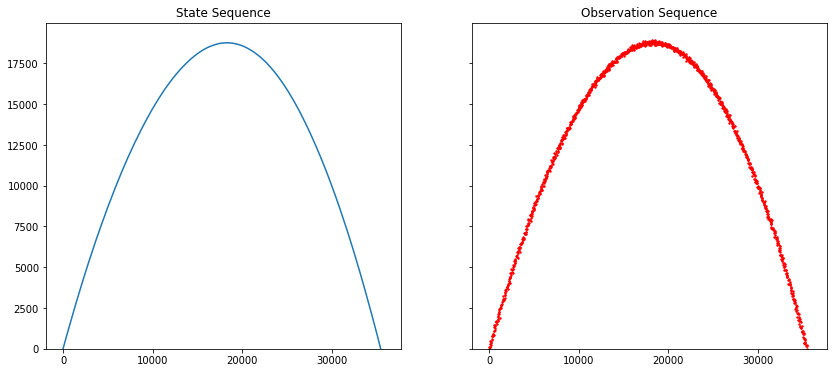

In [7]:
#Plot the result.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6),
                         sharex=True, sharey=True)
ax1, ax2 = axes.ravel()

ax1.set_title("State Sequence")
ax1.plot(X[0,:], X[1,:])

ax2.set_title("Observation Sequence")
ax2.scatter(Y[0,:], Y[1,:], color='red', s=2)

#Set window limits (shared by both axes)
ax1.set_xticks(range(0, 30001, 10000))
ax1.set_yticks(range(0, 17501, 2500))
ax1.set_ylim((0, 20000))

plt.show()